In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\unsupervised_dim_reduct\\impl\\preprocessing.py'>

In [3]:
df = pd.read_csv("data/forest/covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df['Cover_Type'].value_counts()
#getting train_set
df1 = df[df['Cover_Type'] == 1].sample(1620)
df2 = df[df['Cover_Type'] == 2].sample(1620)
df3 = df[df['Cover_Type'] == 3].sample(1620)
df4 = df[df['Cover_Type'] == 4].sample(1620)
df5 = df[df['Cover_Type'] == 5].sample(1620)
df6 = df[df['Cover_Type'] == 6].sample(1620)
df7 = df[df['Cover_Type'] == 7].sample(1620)
df_train = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_train['Cover_Type'].value_counts()

df = df.drop(df_train.index)

df1 = df[df['Cover_Type'] == 1].sample(540)
df2 = df[df['Cover_Type'] == 2].sample(540)
df3 = df[df['Cover_Type'] == 3].sample(540)
df4 = df[df['Cover_Type'] == 4].sample(540)
df5 = df[df['Cover_Type'] == 5].sample(540)
df6 = df[df['Cover_Type'] == 6].sample(540)
df7 = df[df['Cover_Type'] == 7].sample(540)
df_val = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_val['Cover_Type'].value_counts()

df = df.drop(df_val.index)

X_train, y_train = preprocessing.XySplit(df_train, 'Cover_Type')
X_val, y_val = preprocessing.XySplit(df_val, 'Cover_Type')
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
X_test, y_test = preprocessing.XySplit(df, 'Cover_Type')



In [5]:
from sklearn.cluster import KMeans
import numpy as np

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X_train_val)
    Sum_of_squared_distances.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


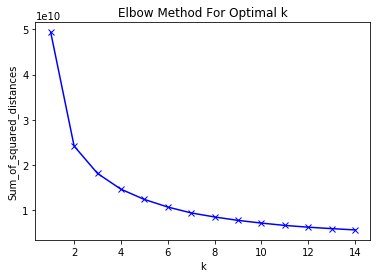

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4

In [197]:
Sum_of_squared_distances2 = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k, n_init=20)
    km = km.fit(X_train_val)
    Sum_of_squared_distances2.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


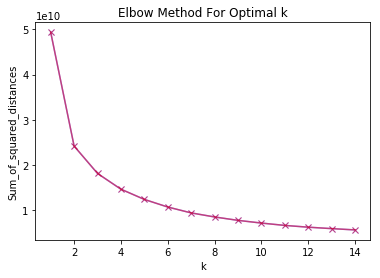

In [203]:
plt.plot(K, Sum_of_squared_distances2, 'bx-', alpha=0.5)
plt.plot(K, Sum_of_squared_distances, 'rx-',alpha=0.5)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4

In [175]:
from scipy import stats

def purityCalculation(X, y, mink=1, maxk=14):
    K = range(mink,maxk + 1)
    purityAvg = []
    for k in K:
        print("k = {}".format(k))
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        
        #for each cluster
        M = []
        for c in range(k):
            cy = y.values[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
#             M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            M.append(m[1][0] / len(cy))
#             print(M)
        purityAvg.append(np.mean(M))
        print(np.mean(M))
    return purityAvg
avg = purityCalculation(X_train_val, y_train_val)   

k = 1
0.14285714285714285
k = 2
0.2632222490511333
k = 3
0.28195762579525074
k = 4
0.31860029612661855
k = 5
0.3165804761289322
k = 6
0.313293102833855
k = 7
0.34421658939187244
k = 8
0.3579449528229658
k = 9
0.365660914297935
k = 10
0.39380117252445734
k = 11
0.38723992299020155
k = 12
0.38282251313057164
k = 13
0.3884770755172884
k = 14
0.3973163333203596


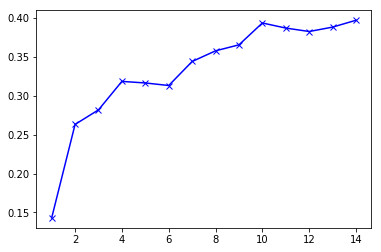

In [177]:
plt.plot(range(1, 15), avg, 'bx-')

In [178]:
mlTest.saveNpArray([range(1, 15), avg], "COVER-KMeans", descriptors="purity")

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train_val)
pca_2d = pca.transform(X_train_val)

In [156]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train_val)


In [186]:
mlTest.saveNpArray(pca_2d, "COVER-PCA2D", descriptors="")

In [167]:
mlTest.saveNpArray(X_embedded, "COVER-TSNE", descriptors="")
mlTest.saveNpArray(X_train_val, "COVER-Data", descriptors="")
mlTest.saveNpArray(y_train_val, "COVER-y", descriptors="")

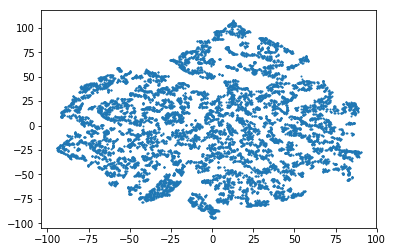

In [157]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=1)
plt.show()

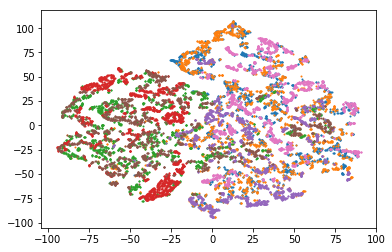

In [158]:
for i in range(1, 8):
    where = np.where(y_train_val ==i)
    plt.scatter(X_embedded[where, 0], X_embedded[where, 1], s=1)

In [194]:
km = KMeans(n_clusters=7)
km = km.fit(X_train_val)
mlTest.saveNpArray(km.labels_, "COVER-KMeans", descriptors="7k-labels")

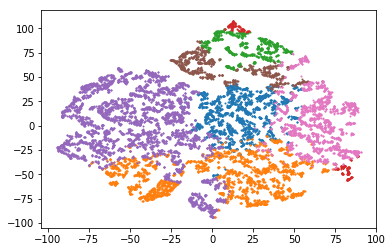

In [192]:
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_embedded[where, 0], X_embedded[where, 1], s=1)

MEAN SHIFT

In [46]:
from sklearn.mixture import GaussianMixture

lowerBound = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = GaussianMixture(n_components=k)
    km = km.fit(X_train_val)
    lowerBound.append(km.lower_bound_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


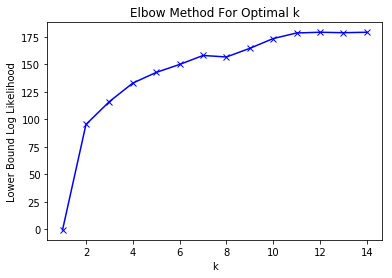

In [101]:
plt.plot(K, lowerBound, 'bx-')
plt.xlabel('k')
plt.ylabel('Lower Bound Log Likelihood')
plt.title('Elbow Method For Optimal k')
plt.show()
# #optimal ~4
mlTest.saveNpArray([K, lowerBound], "COVER-EM", descriptors="k-test")

In [179]:
def purityCalculationEM(X, y, mink=1, maxk=14):
    K = range(mink,maxk + 1)
    purityAvg = []
    for k in K:
        print("k = {}".format(k))
        km = GaussianMixture(n_components=k)
        km = km.fit(X)
        
        #for each cluster
        p = km.predict(X)
        M = []
        for c in range(k):
            cy = y.values[np.where(p == c)[0]]
            m = stats.mode(cy)
            print(m)
            if (len(m[0]) != 0):
#                 M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
                pass
            M.append(m[1][0] / len(cy))
        purityAvg.append(np.mean(M))
        print(np.mean(M))
    return purityAvg
avg = purityCalculationEM(X_train_val, y_train_val)   

k = 1
ModeResult(mode=array([1], dtype=int64), count=array([2160]))
0.14285714285714285
k = 2
ModeResult(mode=array([4], dtype=int64), count=array([2160]))
ModeResult(mode=array([7], dtype=int64), count=array([2152]))
0.28518502013285574
k = 3
ModeResult(mode=array([7], dtype=int64), count=array([1859]))
ModeResult(mode=array([4], dtype=int64), count=array([2160]))
ModeResult(mode=array([5], dtype=int64), count=array([419]))
0.29258245260279053
k = 4
ModeResult(mode=array([5], dtype=int64), count=array([897]))
ModeResult(mode=array([4], dtype=int64), count=array([2160]))
ModeResult(mode=array([7], dtype=int64), count=array([1636]))
ModeResult(mode=array([2], dtype=int64), count=array([957]))
0.36224418981075446
k = 5
ModeResult(mode=array([4], dtype=int64), count=array([2160]))
ModeResult(mode=array([2], dtype=int64), count=array([1569]))
ModeResult(mode=array([7], dtype=int64), count=array([241]))
ModeResult(mode=array([7], dtype=int64), count=array([607]))
ModeResult(mode=array([6], 

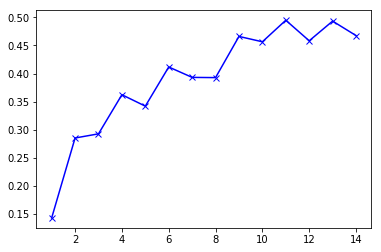

In [180]:
plt.plot(range(1, 15), avg, 'bx-')
mlTest.saveNpArray([range(1, 15), avg], "COVER-EM", descriptors="purity")

In [48]:
em = GaussianMixture(n_components=4)
em = em.fit(X_train_val)

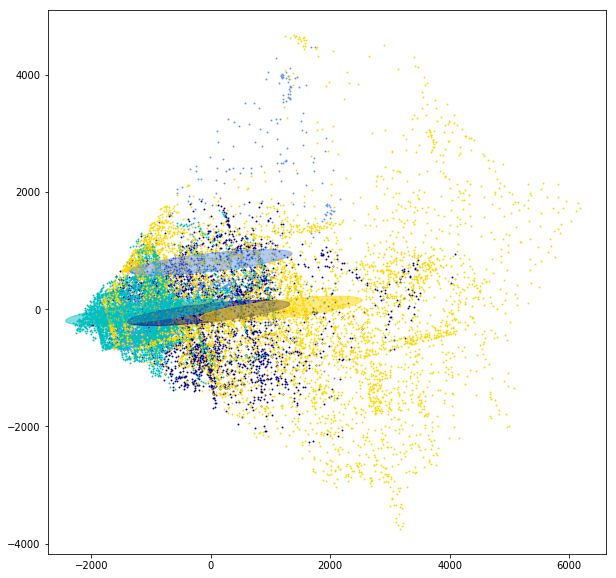

In [99]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, title):
    plt.figure(figsize=(10,10))
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        
        v = pca.transform([v])
        u = pca.transform([u])
        v = v[0]
        u = u[0]
        mean = pca.transform([mean])
        mean = mean[0]
        
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(title)
    
plot_results(pca_2d, em.predict(X_train_val), em.means_, em.covariances_,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

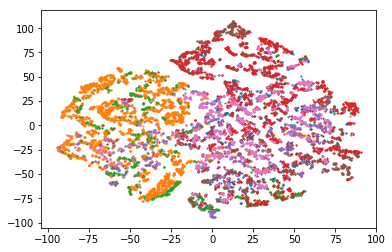

In [196]:
em = GaussianMixture(n_components=7)
em = em.fit(X_train_val)
X = X_embedded
Y_ =  em.predict(X_train_val)
mlTest.saveNpArray(Y_, "COVER-EM", descriptors="7k-labels")
for i in range(7):
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], s=1)

In [92]:

em_mean_pca = pca.transform(em.means_)
em_cov_pca = pca.transform(em.covariances_)
print(em.means_.shape)
print(em.covariances_.shape)

ValueError: Found array with dim 3. Estimator expected <= 2.